#Evidencia 2- Fase 3
Equipo 6:<br>
Ingrid García Hernández, A01754475<br>
Abigail Donají Chavez Rubio, A01747423<br>
Noh Ah Kim Kwon, A01747512<br>
Eduardo Alfredo Ramírez Muñoz, A01754917

In [ ]:
pip install pandas openpyxl

In [ ]:
pip install stanza

In [ ]:
!pip install gensim
!pip install --upgrade numpy==1.25.2

In [ ]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
nltk.download('stopwords')

import unicodedata

from sklearn.metrics import pairwise
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

from six import StringIO

from IPython.display import Image


import pydotplus


import stanza
nlp = stanza.Pipeline('es')

import string

from gensim.models import Word2Vec


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | combined_charlm   |
| depparse     | combined_charlm   |
| sentiment    | tass2020_charlm   |
| ner          | conll02           |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
ruta = '/content/data_test_fold2 - anorexia(in) (1).csv'
import pandas as pd
df = pd.read_csv(ruta)
#Definicion de variables
tweets = df.tweet_text
clase = df.iloc[:, 3]

clases = clase[:200] #1 --> Anorexia, 0 --> No anorexia

In [ ]:
resultadoLimpio = [['malo', 'ayunar', '20', 'día', 'mes', 'día', 'continuo', 'bomitar'], ['7', 'día', '7', 'razón', 'entrenar', 'llegar', 'domingo', 'wow', 'acabar', 'semana', 'porque', 'ninguno', 'cirujano', 'esculpir', 'cuerpo', 'mismo', 'forma', 'hacer', 'binomio', 'nutricición', 'entrenamiento', 'nutrición', 'entrenamiento', 'postureo', 'fuerza', 'introstraining', 'exito28madrid'], ['cookie', 'avenar', 'banana', 'platano', 'cacao', 'super', 'sano', 'facilisimo', 'hacer', 'seguir', 'receta', 'paso', 'paso', 'aquí', 'nota', 'cuanto', 'más', 'finito', 'hacer', 'más', 'crocante', 'healthyfood', 'comidasano', 'sanoynatural'], ['cuanto', 'pesar', 'tú', '29'], ['como', 'bajar', 'peso', 'comer', 'parar', 'tip'], ['querer', 'salir', 'comun', 'crear', 'propio', 'estilo', 'pues', 'saber', 'mujer', 'encantar', 'sentir', 'yo', 'unico', 'gigitrajedebano', 'gigisport', 'runing', 'gym', 'deporte', 'crossfit', 'vidafit', 'zumbo', 'ropadeportivo', 'licra', 'top', 'sancristobal', 'venezuela', 'cucuta', 'colombia', '21mar'], ['por', 'supuesto', 'polo', 'fruta', 'casero', 'más', 'frase', 'patatar', 'sano', 'cuidar', 'él', 'pera', 'ir', 'comer', 'sano', 'paso', 'paso', 'totalmente', 'insano', 'maiz', 'convencio', 'cer', 'sano', 'uno', 'humor', 'hacer', 'él', 'mejor', 'comir', 'nutri_rivers'], ['llegar', 'recién', 'casa', 'echar', 'culpa', 'malo', 'paso', 'mama', 'linda', 'vida', 'sadislife', 'sueycat'], ['empezar', 'el', 'semana', 'con', 'mayor', 'energia', 'y', 'concentración', 'con', 'el', 'super', 'c4', 'el', 'preworkout', 'más', 'vender', 'en', 'usar', 'energia', 'explosivo', 'mayor', 'concentración', 'impulso', 'abrumador', 'enfrentar', 'cualquiera', 'desafio', 'bodysculpting', 'cellucor', 'c4', 'preworkout', 'boutique', 'lunes', 'felizsemana'], ['que', 'moda', 'no', 'enfermedad', 'grave', 'trastorno', 'alimenticio', 'simple', 'juegoverdad'], ['y', 'encima', 'delito', 'vergonzoso', 'tienda', 'mismo', 'talla', 'más', 'pequeno', 'futuro', 'esperar', 'diariode'], ['carajo', 'después', 'fin', 'semana', 'tocar', 'ayunar', 'resto', 'vida', 'rexybill'], ['y', 'mejor', 'sentir', 'motivado', 'entender', 'asco', 'generar', 'comida', 'más', 'fácil', 'anorexia', 'bulimia', 'anorexia', 'bulimia', 'anorexia', 'bulimia', 'ed', 'tca'], ['querer', 'metabolismo', 'gente', 'flaco', 'comir', 'engordar', 'anorexia', 'bulimia', 'anorexia', 'anorexia', 'bulimia'], ['hacer', 'mes', 'tener', 'pedir', 'él', 'ayuda', 'companero', 'subir', 'cierre', 'pollero', 'danza', 'ahora', 'subo', 'ninguno', 'problema', 'esfuerzoyresultado'], ['como', 'poder', 'detectar', 'grupo', 'whatsapp', 'alentar', 'alimentar', 'comunidad', 'anorexia', 'bulimia', 'anorexia', 'bulimia'], ['lenguado', 'naranja', 'ideasdenutricion', 'lenguado', 'naranja', 'cuidatesiempre', 'cocinito'], ['por', 'costar', 'aceptar', 'cuerpo', 'encontrar', 'belleza', 'anorexia', 'dieta'], ['el', 'peor', 'error', 'poder', 'cometer', 'vida', 'intentar', 'dar', 'primero', 'paso', 'descubrir', 'capaz', 'gymjuiceyoga', 'cdmx', 'gymjuiceyoga', 'gym', 'gimnasio', 'entrenamiento', 'training', 'competencia', 'equipo', 'pasion', 'teamwork', 'picoftheday', 'motivacion', 'frasedeldia'], ['él', 'pronto', 'poder', 'ser', 'munequito', 'porcelana', 'anaymialifestyle', 'anaymiaforeverfriends', 'anaymiaarequeen', 'anaymiaporsiempre', 'anaymiatips', 'thinsp0', 'collarbón', 'thighgaps'], ['él', 'tanto', 'perfecto', 'thinspo', 'thinspiration', 'thighgap'], ['como', 'bajar', '20', 'kg', 'navidad', 'dejar', 'comer', 'suficiente', 'y', 'ahoo', 'respuesta', 'anorexia', 'bulimia', 'anorexia', 'bulimia'], ['uno', 'manana', 'laxante', 'malditagordura', 'perfección'], ['bajardepeso', 'mejor', 'deporte', 'liberar', 'estre', 'dejar', 'ansiedad', 'trabajo'], ['sadorexia', 'el', 'pauta', 'cultural', 'globalizado', 'determinado', 'ser', 'delgado', 'joven', 'sinonimo'], ['no', 'contar', 'mal', 'music', 'sport', 'style', 'gym', 'gymmotivation', 'motivation', 'glitter', 'shine'], ['tres', 'puto', 'kilo', 'bajar', 'vez', 'bulimia', 'bulimianervosa', 'bulimia', 'bulimicgirl', 'anorexia', 'anorexiaeetclub', 'anorexiarecovery', 'anorexia', 'fat', 'gordo', 'anorexia', 'bulimia', 'tca'], ['tú', 'interesar', 'cocina', 'y', 'comer', 'sano', 'alimentación', 'healthy', 'cocina', 'nutrición'], ['el', 'acumulación', 'pequeno', 'paso', 'convertir', 'paso', 'grande', 'motivación', 'actitud'], ['ok', 'día', 'lleno', 'ejercicio', 'poco', 'caloria', 'día', 'productivo', 'anorexia', 'bulimia', 'coldprince'], ['nuevo', 'sistema', 'clasificación', 'juego', 'olimpico', 'tokio', '2020'], ['limonado', 'sandia', 'hoy', 'motivado', 'cuidate'], ['abastero', 'corte', 'vacuno', 'chileno', 'horno', 'coccion', 'lento', '4', 'hrs', 'acompano', 'pimiento', 'cebolla', 'asado', 'mismo', 'horno', 'perdon', 'luz', 'sector', 'así', 'mayonés', 'fabricar', 'metodogrez', 'lowcarbchile', 'lowcarb', 'keto', 'lchf', 'lchp'], ['poner', 'aguacate', 'vida', 'menosaguacate', 'ymasgambita'], ['sentir', 'yo', 'bien', 'mal', 'poder', 'condicionado', 'bascula', 'talla', 'anorexia', 'bulimia', 'dieta'], ['el', 'comida', 'llevar', 'final', 'luego', 'pregunta', 'xq', 'hacer', 'xq', 'comistir', 'anorexia', 'gordo', 'feo'], ['tú', 'desear', 'semana', 'tanto', 'vibrante', 'color', 'sofrito', 'comerenvenezuela', 'conloquesepuedecomprar', 'sofrito', 'comidavenezolano', 'bajardepeso', 'healthyfood', 'obesidad', 'sop', 'cocinaparanovata', 'lunes', 'elmundocambiasitucambia'], ['combinar', 'verdura', 'presentar', 'forma', 'original', 'deleito', 'familia', 'pimiento', 'relleno', 'pure', 'papa', 'cocinafacil', 'comersano', 'healthyfood', 'foodporn', 'food', 'foodie', 'foodgasm', 'cdmx', 'mexico', 'elhornodeluca', 'lovecooking', 'instafood'], ['sinazucarorg', 'día', 'ayer', 'azucar', 'anadido', 'sinazucar'], ['comenzar', 'otono', 'cuidar', 'cuerpo', 'salud', 'buscar', 'fitness', 'global', 'cuerpo', 'humano', 'necesitar', 'fuerza', 'potencia', 'agilidad', 'resistencia', 'coordinacion', 'etcétera', 'fitness', 'especializado', 'er', 'lifestyle', 'estilodevido', 'puravido'], ['necesitar', 'bajar', 'tengomiedo', 'anorexia', 'help', 'gordo'], ['comi', 'tres', 'medialuna', 'manana', 'decir', 'si', 'vomitar', 'él', 'almorzar', 'amar', 'él'], ['ir', 'dormir', 'si', 'tami', 'durmio', 'vida', 'putabida', 'suicidir', 'cortar', 'él', 'arrhe', 'enfermo'], ['volver', 'a', 'ser', 'como', 'antes', 'ese', 'chica', 'flaquita', '40k', 'mucho', 'feliz', 'odio', 'ser', 'como', 'ser', 'ahora', 'uno', 'gordo', 'de', '67k', 'infeliiiz', 'volver'], ['no', 'dejar', 'comer', 'legumbre', 'primavera', 'elemento', 'basico', 'dieta', 'elperdigon', 'seleccionar', 'mejor', 'legumbre', 'mejor', 'calibre', 'cochuro', 'cocina', 'llegar', 'mejor', 'calidad', 'sabor', 'dipucordobo', 'legumbre'], ['estar', 'favor', 'anorexia', 'bulimia', 'cumplir', 'suenos', 'aunque', 'tiempo', 'costo', 'demasiado', 'caro'], ['nuestro', 'idola', 'cielolatini', 'ejemplo', 'si', 'bien', 'inicio', 'hermana', 'también', 'padecio', 'este', 'ser'], ['prinzzz', 'respetar', 'comir', 'cerdo', 'jamás', 'serio', 'canivalismo', 'prohibido', 'dema', 'engordar', 'tsssea', 'anorexia'], ['cual', 'cosa', 'más', 'real', 'food', 'ing', 'paleo'], ['deporte', 'batido', 'saludable', 'base', 'superalimento'], ['por', 'morir', 'mejor', 'maldito', 'cerda', 'asqueroso', 'mierdadepersona'], ['comenzar', 'consejo', 'bajar', 'peso', 'ser', 'efectivo', 'si', 'seguir', 'pie', 'letra'], ['desayuno', '1', 'vaso', 'grande', 'agua', 'yogur', 'natural', '125g', 'pizca', 'cereal', 'encima', '20g', '1', 'naranja', 'anorexia', 'bulimia', 'dieta'], ['datar', 'capricho', 'el', 'acebuche', 'pues', 'anchoa', 'cantabrico', '00', 'jamonjamon', 'queso', 'sierra', 'cadiz', 'gran', 'abanico', 'manjar', 'sentirte', 'senor', 'senora', 'domingo', 'reserva', '856', '13', '63', '10', 'restaurante', 'gastronomia'], ['que', 'note', 'viernes', 'vibrantcolors', 'thefeedfeed', 'chickenthighs', 'pouletroti', 'homemadefood', 'foodporn', 'foodpics', 'cleaneating', 'sweetpotato', 'boniato'], ['no', 'hambre', 'aplauso', 'estomago'], ['puta', 'vida', 'injusto', 'tocar', 'comer', 'cerdo', 'fin', 'semana', 'mierda', 'querer', 'morir', 'yo', 'puto', 'fin', 'semana', 'familiar', 'rexybill'], ['más', 'perfecto', 'no', 'creer', 'thinspo', 'anorexia', 'bulimia'], ['él', 'unico', 'comerar', 'día', 'alegrar', 'alegrar', 'comer'], ['ser', 'verdad', 'zumo', 'naranja', 'ir', 'vitamina', 'nutrición', 'salud'], ['chica', 'anuncio', 'dkvseguro', 'apoyo', 'informo', 'mercado', 'amor', 'fatal', 'el', 'proximo', 'vez', 'guapero', 'ofrecer', 'ofrecele', 'ser', 'probable', 'aceptar', 'menos', 'cierra', 'puerta', 'nutri_rivers', 'lavecinarubia', 'sanvalentin2019'], ['comer', 'vomitar', 'asu'], ['pinche', 'loco', 'apoco', 'antojarse', 'taco', 'hamburguesa', 'cosa', 'así', 'delicioso', 'grasoso', 'ajajaja', 'ir', 'vomitar', 'corrar'], ['trabajar', 'en', 'uno', 'nuevo', 'versión', 'en', 'mi', 'mismo', 'fitnessmotivation', 'addict'], ['haber', 'decidir', 'celebrar', 'cumpleano', 'tematico', 'palmerita', 'de', 'chocolate', 'y', 'volver', 'casa', 'casi', '2kg', 'ir', 'ir', 'comer', 'pasar', 'trago', 'manana', 'de', 'el', 'realfat'], ['meta', 'nuevo', 'pesar', '40', 'kilo'], ['a', 'disfrutar', 'el', 'sergio', 'post', 'sergiocresporp', 'regalo', 'crema', 'cacahuete', 'parte', 'vyubero', 'paleo', 'meriendasaludable', 'regalosoriginal', 'diet', 'comersano'], ['mi', 'autoestima', 'suelo', 'y', 'creer', 'comentario', 'negativo', 'mente', 'ayudar', 'alguien'], ['cena', 'homenaje', 'porque', 'valgo', 'lowcarbdiet', 'pescado', 'adelgazar', 'ing', 'alimentacionsaludable'], ['sabio', 'almendra', 'rico', 'calcio', 'fosforo', 'magnesio', 'mineral', 'top', 'mantener', 'buen', 'salud', 'oseo', 'almendra', 'solotienecosasbuen', 'snacksaludable'], ['uno', 'pausa', 'mediodía', 'quedar', 'tomar', 'vino', 'elegir', 'ramon', 'bilbao', 'reserva', 'elaborado', 'mejor', 'racimo', 'tempranillo', 'mazuelo', 'graciano', 'ahora', 'disponible', 'copa', '290eur', 'cafeagora', 'leonesp', 'burguer', 'slowfood', 'healthy', 'menú', 'gourmet'], ['hoy', 'sólo', 'comi', '1000am', 'enfrijolado', '400pm', 'dos', 'rebanada', 'jamon', 'pavo', 'ahora', 'mezcal', 'vino', 'skinny'], ['uno', 'día', 'semana', 'tranquilo', 'uki__', 'boedo', 'entrenamientofuncional', 'powergirl', 'funcionaltraining', 'fuerza', 'equilibrio', 'resistencia', 'boedo', 'distrito'], ['yo', 'dar', 'asco', 'sólo', 'mirar', 'yo', 'espejo', 'parecer', 'cada', 'segundo', 'paso', 'frente', 'kilo', 'más'], ['no', 'costener', 'dinero', 'bio', 'producto', 'raro', 'comer', 'más', 'vegetal', 'fruta', 'legumbre', 'etcétera', 'menos', 'ultraprocesado', 'y', 'ultimo', 'tiempo', 'cambiar', 'habito', 'hacer', 'tener', 'mayor', 'calidad', 'vida'], ['el', 'lucha', 'apologia', 'anorexia', 'bulimia', 'internet', 'costener', 'voluntarismo'], ['odio', 'tener', 'control', 'anorexia', 'bulimia'], ['nunca', 'ser', 'fan', 'si', 'hecho', 'dar', 'mucho', 'hueva', 'tener', 'dar', 'tanto', 'explicación', 'seguir', 'ser', 'gordo'], ['el', 'hombre', 'gran', 'beneficio', 'bajar', 'peso', 'más', 'rapido', 'mujer', 'deber', 'metabolismo', 'más', 'acelerado', 'poder', 'seguir', 'facilidad', 'dieta', 'nivel', 'masa', 'corporal', 'más', 'alto', 'men', 'healthy', 'peso', 'diet'], ['cena', 'sencilla', 'vez', 'menos', 'más', 'er', 'ing'], ['y', 'buen', 'gordo', 'pierna', 'fat'], ['sufro', 'día', 'pero', 'amar', 'vida', 'alguien', 'entender', 'sólo', 'querer', 'vivir', 'feliz', 'depresión', 'anorexia'], ['uno', 'mundo', 'crisis', 'guerra', 'vez', 'parecer', 'unico', 'miedo', 'engordar', 'anorexia', 'bulimia'], ['alguien', 'querer', 'acompanar', 'yo', 'ayudar', '4', 'día', 'anaymia3', 'anaymia0'], ['si', 'ir', 'morir', 'esperar', 'morir', 'delgado', 'perfeccion', 'tengoundeseoyes'], ['que', 'mama', 'decir', 'gordo', 'comienzo', 'laodio'], ['vivir', 'miedo', 'limite', 'dimelo', 'paisavlogs', 'deportivo', 'casual', 'nyfw', 'newyorkfashionweek', 'fgnywf', 'jda', 'estilo', 'tendencia', 'color', 'estampado', 'boy', 'men', 'girl', 'discapacidad'], ['buen', 'fruta', 'nuevo', 'buen', 'tarde', 'realfooding'], ['después', '7', 'deber', 'entrar', 'boca', 'sólo', 'agua', 'azucar'], ['nunca', 'llegar', 'peso', 'nacimiento'], ['mi', 'amiga', 'ignoranno', 'mientenme', 'aconsejar', 'recordar', 'error', 'meta', 'querer', 'princesa'], ['hoy', 'comer', 'más', 'cerdo', 'anorexia', 'bulimia', 'bulimicgirl'], ['en', 'vez', 'poner', 'pretexto', 'poner', 'pensar', 'realmente', 'desea', 'el', 'querer', 'poder', 'anorexia'], ['help', 'perdi', 'objetivo', 'morire', 'subi', 'paresco', 'cerda'], ['pequeno', 'dieta', 'día', '1', 'desayuno', 'tú', '1', 'manzana', 'almuerzo', 'sopa', 'cena', 'tú', 'sopa', 'día', '2', 'desayuno', 'cafe', 'almuerzo', '2', 'manzana', 'cena', 'yogurt', 'ligth', 'día', '3', 'desayuno', 'yogurt', 'ligth', '1', 'manzano', 'almuerzo', 'ensalada', 'verde', 'cena', 'tú', 'sopa'], ['no', 'respetar', 'anorexia', 'bulimia', 'para', 'ejemplo', 'seguir', 'respeto', 'respeto'], ['y', 'luego', 'preguntar', 'enfermo', 'comer', 'alguien', 'demar', 'vomitivo', 'ahora', 'anorexia'], ['no', 'dejar', 'pasar', 'postre', 'no', 'renunciar', 'parte', 'más', 'dulce', 'comida', 'el', 'casero', '100', 'natural', 'probar', 'tarta', 'slowfood', 'healthy', 'menú', 'gourmet', 'hamburguesa', 'postre', 'casero', 'tarta'], ['cerdo', 'agridulcer', 'pina', 'otro', 'favorito', 'sweet', 'and', 'sour', 'pork', 'with', 'pineapple', 'cerdo', 'pork', 'pina', 'pinnaple', 'comidachina', 'chinesefood', 'comidacasero', 'homefood'], ['ese', 'momento', 'mente', 'traicionar', 'hacer', 'sentir', 'ninito', 'más', 'deshidratado', 'raquitico', 'africo', 'recordar', 'baby', 'no', 'coldprince'], ['si', 'arriesga', 'arriesga', 'crossfit', 'coach', 'crossfitgam', 'crossfitter', 'entreno', 'atlethe', 'train', 'work', 'workout', 'training', 'strict', 'athlete', 'fit', 'fitinspiration', 'coreperformance', 'strong', 'gym', 'box', 'muscle', 'bodybuilding', 'sport', 'lifestyle', 'arroyomolino'], ['hoy', 'día', 'precioso', 'empezar', 'entrenar', 'trabajar', 'descansar', 'relajar', 'tú', 'disfrutar', 'finde', 'querer', 'siempre', 'movimiento', 'runner', 'gym', 'felizsabado', 'felizfinde'], ['feliz', 'solsticio', 'invierno', 'bolita', 'atun', 'queso', 'pistacho', 'acomer', 'canape', 'foodporn', 'nikond3400', 'nikón', 'foodphotography', 'photography', 'andalusia'], ['chica', 'semana', 'moda', 'new', 'york', 'nuevo', 'thinspo'], ['querer', 'mejorar', 'forma', 'fisico', 'en', 'centro', 'proporcionar', 'ejercicio', 'personalizado', 'mejorar', 'monitor', 'pilate', 'pilatessevilla', 'pilatesstudio', 'pilatesparatodo', 'ponteenformo', 'entrenamiento', 'core', 'pilatesmaquino', 'pilatesoriginal', 'sevilla', 'mairena', 'trx'], ['el', 'puta', 'madre', 'querer', 'morir', 'yo', 'subir', 'kilo', 'ahora', '64', 'alguien', 'tiro', 'cabeza', 'rexybill'], ['no', 'ser', 'papas', 'frita', 'costillar', 'cerdo', 'horno', 'zapallo', 'italianoszucchini', 'horneado', 'salteado', 'saldado', 'tomate', 'cebolla', 'morada', 'aka', 'ensalada', 'chileno', 'metodogrez', 'keto', 'lchf', 'lowcar', 'b'], ['mi', 'suegra', 'intentar', 'convencer', 'yo', 'tomar', 'azucar', 'buen', 'no', 'ser', 'saque', 'matrix', 'sugarfree'], ['cuarto', 'día', 'ayuno', 'dalir', 'poder'], ['el', 'día', 'conseguir', 'ser', 'princesa', 'querer', 'ser', 'subirar', 'foto', 'cuerpo', 'agradecer', 'hacer'], ['mejor', 'querer', 'hacer', 'nunca', 'dejar', 'correr', 'si', 'poder', 'runningteamsuperacion', 'salud', 'healthylifestyle', 'healthyfood', 'ejercicio', 'motivation', 'yoelegicorrer', 'runningteamsuperacion', 'gabrielhugovilella', 'personaltrainer', 'iloverunn', 'runhappy'], ['nuevo', 'ano', 'nuevo', 'meta', 'llegar', '45k'], ['alisafitangel', 'en', 'menos', 'mes', 'ir', 'vacaciones', 'playa', 'odio', 'poder', 'ver', 'yo', 'así', 'alguno', 'día'], ['en', 'ayuno', 'solo'], ['hola', 'todo', 'seguir', 'q', 'igual', 'holaaaaa', 'yo', 'ver', 'aquí', 'nuevo', 'cerda', 'gordo', 'arrepentido'], ['vete', 'verga', 'andrea', 'culpa', 'afectar', 'cenar', 'vomitar'], ['momento', 'doler', 'cuerpo', 'solo', 'sentir', 'satisfacción', 'haber', 'lograr', 'día', 'más', 'anorexia', 'bullimic', 'anorexia', 'bulimia', 'princesa', 'tca'], ['día', '13', 'ayuno', 'hoy', 'si', 'mareo', 'hecho', 'estrago', 'rexybill'], ['el', 'realidad', 'detra', 'mejor', 'proteina', 'atun', 'cocinafacil', 'comersano', 'healthyfood', 'foodporn', 'food', 'foodie', 'foodgasm', 'cdmx', 'mexico', 'elhornodeluca', 'lovecooking', 'instafood', 'recetasrapido', 'recipe', 'recipes', 'receta'], ['pensar', 'comer', 'no', 'coma', 'distrae', 'ver', 'tv', 'think', 'before', 'you', 'eat', 'dont', 'eat', 'while', 'distracted', 'watch', 'tv', 'anatips'], ['buen', 'tarde', 'amigs', 'dar', 'hacer', 'tarde', 'mejor', 'practicar', 'fiestaparksport', 'jueves', 'entrenamiento', 'sinexcusa', 'fit', 'gym', 'gimnasio', 'benidorm', 'personaltrainer'], ['moleste', 'preparado', 'desayuno', 'ricosano', 'aludablecomersano', 'comerber'], ['5', 'cosa', 'deber', 'saber', 'empezar', 'levantar', 'pesa'], ['tarde', 'cocina', 'galleta', 'avenar', 'platano', 'chocolate', 'pan', 'centeno', 'integral', 'receta', 'nutri_rivers', 'el', 'cocina', 'terapeutico', 'vez', 'suma', 'comida', 'sano', 'vuelta', 'atrás'], ['ser', 'imposible', 'moderar', 'él', 'producto', 'estar', 'especialmente', 'disenado', 'poder', 'dejar', 'consumir', 'él', 'el', 'senal', 'hormonal', 'más', 'fuerte', 'voluntad', 'ser', 'droga', '1er', 'paso', 'desintoxicacion', 'processed', 'foods', 'and', 'food', 'reward'], ['disfrutar', 'suave', 'sabor', 'pollito', 'leche', 'salsa', 'cacahuate', 'platillo', 'super', 'fácil', 'hacer', 'cocinafacil', 'comersano', 'healthyfood', 'foodporn', 'food', 'foodie', 'foodgasm', 'cdmx', 'mexico', 'elhornodeluca', 'lovecooking', 'instafood', 'recetasrapido'], ['momento', 'relax', 'después', 'servicio', 'hoy', 'día', 'también', 'cosa', 'interesante', 'quedar', 'más', 'medio', 'día', 'aun', 'cocina', 'cooking', 'amigo', 'smile'], ['when', 'mides', '171', 'pesa', '64', 'kilo', 'perder', 'casi', '20', 'tablaanaymia', 'bulimia', 'anorexia', '46kg', 'wecandoit'], ['hola', 'linda', 'gente', 'dar', 'invitación', 'unir', 'él', 'grupo', 'whatsapp', 'anorexia', 'bulimia', 'así', 'compartir', 'logro', 'apoyar', 'si', 'personitar', 'gustar', 'dejar', 'número', 'comentario', 'privado', 'gracia', 'leer'], ['amorporana3', 'mirar', 'hermoso', 'hueso', 'tanto', 'perfecto', 'thinspo', 'thinspiration', 'thin'], ['hoy', 'proponer', 'rico', 'arroz', 'coco', 'curry', 'ser', 'sorprendente', 'bien', 'combinar', 'coco', 'curry', 'dulzor', 'paso', 'todo', 'explosion', 'sabor', 'nutricion', 'ing', 'foodporn', 'felizmiercoles', 'receta'], ['princesa', 'masticar', 'papel', 'tener', 'propiedad', 'adelgazante', 'y', 'mejor', 'si', 'hoja', 'blanco', 'puro', 'prins', 'tip'], ['buen', 'puente', 'gente', 'guapo', 'cena', 'esqueixado', 'tres', 'despido', 'lunes', 'tener', 'cuidado', 'ahí', 'afuerar', 'lowcarbdiet', 'alimentacionsaludable', 'adelgazar'], ['lastimoso', 'segar', 'presionar', 'mujer', 'verno', 'perfecto', 'cero', 'real'], ['mi', 'thinspo', 'hoy', 'ver', 'si', 'poder', 'evitar', 'comida', 'vez', 'anorexia', 'bulimia', 'anorexia', 'anorexia', 'bulimia'], ['si', 'seguir', 'hacer', 'ejercicio', 'comer', 'menos', '800kcal', 'ano', 'nuevo', 'ir', 'bajar', 'montón', 'anorexia', 'bulimia', 'anorexia', 'bulimia', 'anorexia', 'bulimia', 'ed'], ['traigo', 'putero', 'hambre', 'castigar', 'ayer', 'trague', 'chingo', 'pizza', 'chocolate'], ['no', 'seguro', 'poner', 'él', 'parecer', 'pero', 'estar', 'caer', 'llevar', '2', 'huevazo', 'chorizo', 'de', 'el', 'pueblo', 'sobrante', 'puchero', 'así', 'mil', 'perdón', 'duda', 'elaboracion', 'falsefooders'], ['yellow', 'monday', 'lunes', 'amarillo', 'cafi', 'carrera', '24', 'calle', '29', '30', 'si', 'entrenar', 'buen', 'si', 'divertir', 'entrenar', 'ser', 'mejor', 'gymsalud', 'gym', 'salud', 'gimnasiogimnasios'], ['desayuno', 'día', 'lluvioso', 'tostada', 'pan', 'centeno', 'integral', 'nutellacara', 'platano', 'canela', 'acompanado', 'kakis', 'manzana', 'microondo', 'canela', 'tú', 'matcha', 'sugarfree', 'sinazucar', 'breakfast', 'nutellafit', 'i'], ['menos', 'pastilla', 'más', 'zapatilla', 'running', 'sport', 'gym', 'healthylifestyle'], ['el', 'mejor', 'opción', 'snacks', 'pequeno', 'casa', 'cocinafacil', 'comersano', 'healthyfood', 'foodporn', 'food', 'foodie', 'foodgasm', 'elhornodeluca', 'lovecooking', 'instafood', 'recetasrapido', 'recipe', 'recipes', 'receta', 'comidamexicano', 'mexicanfood'], ['sábado', '16', 'marzo', '2019', 'xii', 'torneo', 'boxeo', 'amateur', 'dra', 'josefino', 'gomez', 'hacer', 'alarde', 'gran', 'talento', 'apego', 'música', 'criolla', 'boxeo', 'deporte', 'entrenamiento', 'training'], ['some', 'thinspo', 'my', 'bebs', 'thinspo', 'anaandmia'], ['este', 'jugar', 'pero', 'llevar', 'tiempo', 'así', 'ver', 'diferencia', 'querer', 'morir'], ['que', 'difícil', 'comer', 'fruta', 'preparado', 'lista', 'consumir', 'comefruta', 'fruitlover', 'fruit', 'instafood', 'instafruit', 'fruitadict', 'instanutrition', 'er'], ['sentir', 'cada', 'día', 'pasar', 'consumir', 'más', 'peor', 'querer', 'poder', 'parar', 'rexybill', 'mindfuck'], ['quinto', 'día', 'ayuno', 'completo', 'complicar', 'detener', 'conforme', 'peso', 'rexybill'], ['el', 'sensación', 'mareo', 'hacer', 'gym', 'más', 'satisfactorio', 'anorexia', 'bulimia'], ['como', 'atreverse', 'decir', 'bien', 'lagrima', 'ojo', 'sangre', 'muneco', 'ihateme'], ['ese', 'hermoso', 'sensación', 'sentir', 'holgado', 'ropa'], ['no', 'dejar', 'publicar', 'siempre', 'él', 'hacer', 'él', 'sentir', 'debil', 'hambriento', 'encantar', 'sentimiento'], ['que', 'comer', 'antes', 'después', 'salir', 'correr', 'marianymata'], ['en', 'desayuno', 'buffet', 'también', 'encontrar', 'opción', 'saludable', 'huevo', 'yogurt', 'leche', 'especial', 'lactoso', 'fruta', 'fresca', 'galleta', 'glutar', 'elegir', 'alojamiento', 'desayuno', 'reserva', 'web', 'contratalo', 'recepción', 'ibiza', 'hostaltarba'], ['q', 'hijo', 'puta', 'multifruto'], ['querido', 'princess', 'si', 'dejar', 'paz', 'hambre', 'desear', 'devorar', 'tú', 'satisfecho', 'pero', 'tú', 'ser', 'más', 'fuerte', '3'], ['secreto', 'si', 'pregunta', 'xq', 'hacer', 'nose', 'si', 'entender', 'placer', 'q', 'sentir', 'ver', 'sangre', 'correr'], ['que', 'dar', 'gana', 'cagar', 'vomitar', 'mismo', 'tiempo', 'tu', 'eligir', 'primero', 'bulimiaproblems', 'bulimia'], ['caminar', 'manana', 'cardio', 'cardioworkout', 'senderismo', 'instagood', 'domingo', 'amigo', 'girl', 'ruta', 'descenso', 'love', 'avistamiento', 'fruta', 'nature', 'photoofthedo', 'y'], ['en', 'carta', 'encontrareis', 'comida', 'tradicional', 'producto', 'primero', 'calidad', 'delicioso', 'croqueta', 'restoviedo'], ['yo', 'dar', 'consejo', 'ser', 'mejor', 'anorexia', 'porfavor', 'anorexia', 'princesa'], ['si', 'q', 'peligro', 'entrar', 'libreria', 'invertid', 'conocimiento', 'salud', 'gracia', 'infinito', 'reevalol', 'x', 'regalar', 'yo', 'primero', 'realfooder', 'eatrealfood'], ['hoy', 'comer', 'garbanzo', 'cocer', 'aceite', 'oliva', 'virgen', 'pasado', 'ajito', 'hecho', 'sarten', 'lata', 'atun', 'comidasalulable', 'centropadelpro', 'bullpadelsport'], ['estupido', 'gordura', 'cargo', 'yabasta', 'perfección'], ['ser', 'nuevo', 'nuevo', 'cuenta', 'sólo', 'ayunar', '2', 'día', 'máximo', 'pensar', 'lograr', '10', 'día', 'más', 'rexybill'], ['ayuda', 'alguien', 'favor', 'hablamar', 'ayudame', 'cambiar', 'dejar', 'ser', 'bola', 'grasa', 'favor'], ['no', 'dejar', 'mente', 'controlar', 'cuerpo', 'hacer', 'ejercicio', 'moda', 'querertar', 'mismo', 'ejercicio', 'gym', 'workout', 'miami', 'florida'], ['gordo', 'estilo', 'vida', 'bulimia', 'bulimicgirl', 'anorexia', 'tca'], ['hoy', 'face', 'hablar', 'pagina', 'anorexia', 'bulimia', 'anorexia', 'bulimia', 'elche'], ['glutamine', 'powder', 'optimunnutrition', 'base', 'lglutamina', 'puro', 'aminoacido', 'importante', 'desarrollo', 'recuperación', 'muscular', 'uso', 'mezclar', '1', 'cuchar', '240', 'ml', 'agua', 'bebida', 'favorita', 'gym', 'fit', 'sport', 'feliz', 'lunes', 'ufc', 'fight', 'on', 'glutamine', 'powder'], ['el', 'fruta', 'arte', 'hoy', 'proximo', 'viernes', 'día', '1', 'haber', 'tallador', 'fruta', 'mercado', 'mercadodechamberi', 'chamberi', 'madrid', 'healthyfood', 'healthy', 'ing', 'fruta', 'arte', 'artfruit'], ['adrenalina', 'el', 'energia', 'activo', 'visitar', 'adrenalinafit_', 'conocer', 'nuevo', 'linea', 'entrenar', 'lucir', 'cualquiera', 'ocasión', 'adrenalinafit', 'adrenalinafitvzla', 'deporte', 'sport', 'zumba', 'anzoategui', 'anz', 'vzla', 'sport', 'sportwear', 'caráca', 'ir'], ['yo', 'poder', 'no', 'nesesitar', 'comida', 'vivir', 'si', 'felicidad', 'bajar', 'peso'], ['él', 'unico', 'buen', 'día', 'comer', 'banar', 'yo', 'vomitar', 'absolutamente', 'hermoso', 'volver', 'vomitar', 'siempre', 'para', 'siempre'], ['hoy', 'comi', 'querer', 'vomitar', 'vivalabulimia'], ['parecer', 'poder', 'dejar', 'insultar', 'anorexia', 'bulimia', 'vida', 'anorexia', 'bulimia', 'asco'], ['ir', 'salvaje', 'deber', 'comer', 'mandarina'], ['no', 'recordar', 'día', 'comezo', 'día', 'vida', 'cambio', 'siempre', 'anorexia', 'bulimia', 'staystrong', 'helpme', 'plea', 'e'], ['uno', 'cuerpo', 'delgado', 'faltar', 'l'], ['si', 'poder', 'imaginar', 'poder', 'lograr'], ['tip', 'pro', 'si', 'come', 'naranja', 'ingerir', 'comida', 'vomita', 'más', 'más', 'rapido', 'd', 'informacionquecura'], ['vuelto', 'pesar', 'después', 'taaanto', 'tiempo', 'subir', '10', 'kg', 'intentar', 'mantener', 'yo', 'alejado', 'perder', 'pelo'], ['sólo', 'querer', 'correr', 'correr', 'tanto', 'lejos', 'dond', 'solo', 'importe', 'reflejo', 'q', 'ser', 'realmente', 'jodido', 'jamás', 'escapar'], ['y', 'entonces', 'estar', 'enamorado', 'mismo', 'ir', 'poder', 'ser', 'feliz', 'enamorar', 'alguien', 'camiseta', 'divinamente', 'espalda', 'yoga', 'modamujer', 'ropa', 'ropamujer', 'taichi', 'salud', 'saludoalsol', 'vida', 'frase', 'girl', 'madrid', 'madridyoga', 'amor', 'amorpropio', 'deporte'], ['ayer', 'celebro', 'diamundialdelaalimentacion', 'semana', 'blog', 'querido', 'compartir', 'consejo', 'llevar', 'alimentación', 'saludable', 'no', 'perdar', 'alimentación', 'alimentacionsaludable', 'salud', 'vivirmejor'], ['pollo', 'cerveza', 'seta', 'verdurito', 'tomillo', 'ser', 'cazuelita', 'hacia', 'chupchup', 'día', 'comer', 'hoy', 'no', 'sobrado', 'subirar', 'receta', 'blog', 'breve', 'querer', 'si', 'si', 'chupchupchup', 'comidasana', 'comerber'], ['nose', 'poder', 'más', 'gana', 'morir', 'bajar', 'peso', 'anorexia', 'bulimia', 'anorexia', 'anorexia', 'bulimia', 'suicida'], ['buen', 'día', 'nuestro', 'cuerpo', 'merecer', 'mejor', 'tratocompromiso', 'asumido', 'eatfresh', 'eggs', 'omega3', 'healthy', 'healthyfood', 'ing', 'saludable', 'nutricion', 'aguacate'], ['deber', 'vivir', 'tal', 'manera', 'q', 'cada', 'día', 'buen', 'día', 'morir', 'xq', 'jas', 'hecho', 'quedar', 'd', 'deuda', 'to', 'suicidegir', 'ls'], ['comer', 'necesidad', 'comer', 'forma', 'inteligente', 'arte', 'francoi', 'el', 'rochefoucauld', 'escritor', 'aristocrata', 'por', 'escoger', 'producto', 'más', 'fresco', 'cocinar', 'mejor', 'manera', 'disfrutar', 'buen', 'comer', 'zamora', 'comerber', 'felizsabado'], ['entrenar', 'maraton', 'boston'], ['no', 'entender', 'sentir', 'tanto', 'mal', 'recordar', 'ultimo', 'solido', 'comi', '10', 'manana'], ['delgadez', 'maximo', 'ver'], ['hoy', 'hacer', 'ayuno', 'ayuno', 'anorexia', 'bulimia', 'aliso', 'princesa', 'perfección'], ['el', 'mejor', 'calentamiento', 'entrenamiento', 'pierna', 'xd', 'legday', 'motivation', 'diet', 'salud', 'eatclean', 'exercise', 'fitlife', 'fit', 'training', 'bodybuilder'], ['uno', 'día', 'más', 'día', 'menos', 'esfuerzo', 'tener', 'recompenza', 'pasar', 'hambre', 'unico', 'dolor', 'valer', 'pena', 'nomerindonoteat'], ['ser', 'flaco', 'ser', 'perfecto'], ['el', 'verdad', 'preferir', 'sentir', 'dolor', 'estomago', 'vacío', 'dolor', 'haber', 'comer'], ['uno', 'buen', 'motivación', 'vida', 'darkroomapp', 'ejercicio', 'gym', 'salud', 'fit', 'deporte', 'n', 'entrenamiento', 'vidasana', 'motivacion', 'workout', 'saludable', 'nutricion', 'gimnasio', 'motivation'], ['no', 'servir', 'si', 'todo', 'sentado'], ['ir', 'carino', 'bajar', 'peso', 'amor', 'deberia'], ['tabla', 'peso', 'princesa'], ['que', 'deber', 'sentir', 'mirar', 'pie', 'vez', 'panza', 'miras', 'abajoana', 'bulimia', 'anorexia', 'bulimia', 'anorexia', 'bulimia', 'ed'], ['el', 'cantidad', 'comida', 'deber', 'ingerir', 'mantener', 'peso', 'saludable', 'preocupar', 'mucho', 'persona', 'ing', 'comida', 'saludable', 'healthy', 'felizlun', 'comer', 'caloria', 'dietasaludable', 'nutricion', 'articulo'], ['casi', 'siempre', 'bajo', 'regla', 'más', 'debil', 'hoja', 'vomito', 'aun', 'comer', 'tip'], ['siempre', 'tener', 'excusa', 'tratar', 'sacar', 'el', 'cabeza', 'arriesgate', 'empezar', 'nuevo', 'vida', 'tú', 'esperar', 'ser', 'monkeybusinessxfit', 'crossfit', 'guayaquil', 'ecuador'], ['ser', 'come', 'instachile', 'l4l', 'f4f', 'barbiedoll', 'skinny', 'celine', 'redhair'], ['y', 'cenar', 'pizza', 'harina', 'integral', 'verdura', 'asado', 'queso', 'gouda', 'el', 'día', 'inventar', 'foto', 'olor', 'thermomixate', 'comesanoyrico', 'pizza', 'summer', 'sinfiltro', 'quecalor', 'foodstagram', 'foodporn', 'foodblogger'], ['sentir', 'estupido', 'comida', 'querer', 'bo', 'hacer', 'él', 'si', 'madre', 'sospechar', 'nuevo'], ['a', '2', 'carne', 'hoy', 'cerdo', 'pollo', 'horno', 'guarnicion', 'champinón', 'salteado', 'mantequilla', 'junto', 'berro', 'diente', 'dragon', 'y', 'obviamente', 'mayonesa', 'casero', 'hecho', 'aceite', 'pepito', 'uva', 'metodogrez', 'lowcarbchile', 'keto', 'lchf', 'lchp'], ['quien', 'querer', 'imagen', 'extremo', 'delgadez', 'adolescente', 'anorexia', 'dieta'], ['para', 'perder', 'grasa', 'localizado', 'cono', 'manera', 'express', 'metetar', 'dedo', 'vagina', 'después', 'cada', 'comida', 'truqui'], ['uno', 'rico', 'almuerzo', 'pero', 'manzana', '3'], ['algo', 'andar', 'mal', 'aquí', 'josepika', 'vidasanayactivo'], ['tú', 'contar', 'encuentro', 'estancado', 'poder', 'parar', 'comer', 'ir', 'autocontrol', 'querer', 'morir', 'si', 'alguien', 'apuntar', 'hacer', 'alguno', 'dieta', 'yo', 'hablenme', 'anorexia', 'bulimia', 'fat', 'gordo', 'anorexia', 'thinspo', 'thinspiration'], ['disfrutar', 'naturaleza', 'streetart', 'streetphotography', 'urbanart'], ['lenteja', 'madre', 'almendra', 'molido', 'el', 'dinosaurio', 'también', 'querer', 'hoycomemo', 'tupper', 'lentejasconverduras', 'almendra', 'er', 'instafood', 'instanutrition'], ['felizsabado', 'chica', 'recordar', 'comida', 'bien', '3', 'segundo', 'delgado', 'todo', 'vida', 'animo'], ['mejorar', 'entrenamiento', 'llevalo', 'máximo', 'nivel', 'nexo', 'sin', 'duda', 'auténtico', 'revolución', 'mundo', 'compruebalo', 'descubrir', 'ofrecer', 'maquina', 'pionero', 'mundo', 'nexarevolution'], ['hoy', 'levantado', 'gana', 'currar', 'yo', 'desayuno', 'buenosdia', 'goodmorning', 'reto1mesconcomidareal', 'cafe', 'coffee', 'pandeespelta', 'aguacate', 'avocado'], ['atar', 'reflejo', 'sweetanorexia', 'ed', 'fucklife'], ['manana', 'tocar', 'pesar', 'yo', 'acojonar', 'poder', 'tomar', 'día', 'buen', 'arrancar', 'cabeza', 'bulimia', 'anorexia', 'tca'], ['uno', 'vez', 'conocer', 'nunca', 'más', 'libraro', 'perseguir', 'todo', 'vida'], ['cuanto', 'más', 'casa', 'desespir', 'comer', 'paff', 'acudir', 'bulimia', 'culpabilidad'], ['yo', 'comi', 'chicle', 'calmar', 'ansiedad', 'comi', '4', 'galletita', 'chocolate', 'hablamar', 'gordo', 'anorexia', 'bulimia', 'bulimia', 'anorexia', 'anorexia', 'bulimia'], ['no', 'detener', 'brazo', 'parecer', 'pierna', 'vikingspirit', 'goldenero'], ['amar', 'ojera', 'tanto', 'asdgfjhljs3', 'anamiasuicidalcut'], ['sentir', 'engordo', '50kg', 'cada', 'vez', 'bulimia', 'bulimia', 'bulimicgirl', 'anorexia', 'anorexiaeetclub', 'anorexia', 'anorexia', 'bulimia', 'tca', 'ed', 'bulimianervo', 'a'], ['anorexia', 'bulimia', 'todo', 'pasar', 'decir', 'querer', 'salir', 'enfermedad', 'impedir', 'fondo', 'desear', 'mismo', 'dejar', 'ganar', 'lado', 'negativo'], ['prinzzz', 'respetar', 'comir', '5', 'vez', 'día', 'después', 'dar', 'metabolismo', 'engordar', 'ke', 'asko', 'pendeja'], ['hoy', 'dejar', 'receta', 'uno', 'patata', 'relleno', 'ideal', 'combatir', 'frío', 'intenso', 'anunciar', 'fin', 'semana', 'sacar', 'cuchar', 'comer', 'patatasrellenasdecarneguisada', 'patatasrelleno', 'realfooding', 'recetaspiruleto'], ['baja', 'comida', 'habertela', 'comer'], ['este', 'tanto', 'perfecto', 'thinspo'], ['uno', 'ano', 'cerrar', 'cargado', 'buen', 'deseo', 'grande', 'reto', 'cumplido', 'superar', 'anorexia', 'bulimia'], ['sólo', 'parcela', '70', 'disfrutar', 'exquisito', 'platillo', 'unico', 'original', 'compartir', 'ser', 'querido', 'visitar', 'sitio', 'web', 'comidagourmet', 'restaurantemexicanovalledeguadalupe', 'vinedosmexicano'], ['comprar', 'botella', 'agua', 'chicle', 'sobrevivir', 'team'], ['que', 'más', 'perfecto', 'estoc', 'ojalar', 'alguno', 'día', 'lograr', 'así', 'quiza', 'sentar', 'bonito', 'delgado', 'flaco'], ['jodido', 'crecer', 'youtube', 'ir', 'tipo', 'cosa', 'hacer', 'victimizar', 'él', 'derecha', 'muuuuuuy', 'llorón', 'culero', 'ver', 'mazo', 'pasta', 'andar', 'denuncia', 'tonto', 'vídeo', 'bastante', 'top'], ['no', 'salir', 'comer', 'saber', 'ruido', 'estomago', 'aplauso', 'hambre'], ['hoy', 'comer', 'dar', 'inaugurado', 'navidad', 'arroz', 'horno', 'tradicional', 'eatclean', 'diet', 'fit', 'gym', 'sport', 'dietista', 'nutricionista', 'nutrición'], ['a', 'comer', 'panza', 'lleno', 'fibra', 'antioxidante', 'tortilla', 'brocoli', 'omega3', 'saludable', 'nutricion', 'perdergraso', 'perderpeso', 'comidasano', 'eatclean', 'eatingclean'], ['en', 'dietamediterranea', 'legumbre', 'verdura', 'hortaliza', 'estar', 'base', 'encantar', 'receta', 'chary', '_serrano', 'lenteja', 'salteado', 'curry', 'ideal', 'verano', 'mejor', 'legumbreslaflor', 'cordobasabe'], ['intentar', 'comer', 'cada', 'día', 'mejor'], ['cuando', 'existir', 'gana', 'posible'], ['como', 'conseguir', 'ejercicio', 'intenso', 'gluteo', 'cualquiera', 'parte', 'carga', 'adicional', 'el', 'calistenia', 'estimular', 'creatividad', 'recurso', 'aparecer', 'sencillo', 'util', 'eficiente', 'gluteo', 'outdoor'], ['conocer', 'alfo', 'quien', 'espíritu', 'entrega', 'ayudar', 'lograr', 'objetivo', 'sisepuede', '21mar', 'emprendedor', 'salud', 'deporte', 'mma', 'fitnesdecombate', 'caraca', 'venezuela'], ['whatsapp', 'nuevo', 'escondite', 'comunidad', 'anorexia', 'bulimia'], ['barby_arando', 'anaymia_1', 'querer', 'tener', 'cuerpo'], ['desayuno', 'martes', 'bien', 'empezar', 'bien', 'acabar', 'adelgazar', 'lowcarbdiet', 'alimentacionsaludable', 'ing', 'comidadeverdad'], ['por', 'domingo', 'saludable', 'nutrición', 'comersaludable', 'motivación', 'nutricionista', 'healthy', 'medicina']]



In [ ]:
def vectorizacion(resultadoLimpio):
  '''
  La función de vectorizacion(resultadoLimpio) tiene como objetivo obtener el
  valor vectorial por cada una de las palabaras encontradas en los tweets ya
  preprocesados.
  El dato de entrada es una lista de lista de strings y el dato de salida es un
  objeto de tipo Word2Vec.
  '''

  model = Word2Vec(
    sentences = resultadoLimpio,
    vector_size = 70,
    sg = 1,
    window = 10,
    min_count = 1,
  )
  return model

In [ ]:
modeloVector = vectorizacion(resultadoLimpio)

print("Palabras semjantes a anorexia, las 5 primeras")
words = modeloVector.wv.most_similar("anorexia", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a ser, las 5 primeras")
words = modeloVector.wv.most_similar("ser", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a comer, las 5 primeras")
words = modeloVector.wv.most_similar("comer", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a más, las 5 primeras")
words = modeloVector.wv.most_similar("más", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a querer, las 5 primeras")
words = modeloVector.wv.most_similar("querer", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a poder, las 5 primeras")
words = modeloVector.wv.most_similar("poder", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a si, las 5 primeras")
words = modeloVector.wv.most_similar("si", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a bulimia, las 5 primeras")
words = modeloVector.wv.most_similar("bulimia", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a día, las 5 primeras")
words = modeloVector.wv.most_similar("día", topn=5)
for word in words:
  print(word)
print()

print("Palabras semjantes a yo, las 5 primeras")
words = modeloVector.wv.most_similar("yo", topn=5)
for word in words:
  print(word)
print()

Palabras semjantes a anorexia, las 5 primeras
('el', 0.9491262435913086)
('mejor', 0.9361027479171753)
('bulimia', 0.9348229169845581)
('salud', 0.9342411160469055)
('yo', 0.9317028522491455)

Palabras semjantes a ser, las 5 primeras
('mejor', 0.9463515281677246)
('el', 0.9352149367332458)
('healthy', 0.9307947754859924)
('más', 0.928837776184082)
('yo', 0.9279494285583496)

Palabras semjantes a comer, las 5 primeras
('el', 0.940555989742279)
('yo', 0.9306520819664001)
('deporte', 0.929939866065979)
('día', 0.9295841455459595)
('desayuno', 0.9277775883674622)

Palabras semjantes a más, las 5 primeras
('el', 0.9411283731460571)
('si', 0.9401081800460815)
('healthy', 0.9376063942909241)
('mejor', 0.9368899464607239)
('saludable', 0.9356210231781006)

Palabras semjantes a querer, las 5 primeras
('el', 0.9276041388511658)
('mejor', 0.9259621500968933)
('ser', 0.9247355461120605)
('deporte', 0.924311637878418)
('yo', 0.9241870641708374)

Palabras semjantes a poder, las 5 primeras
('mejor', 

In [ ]:
def transformacion(tweets):
  '''
  La función transformacion(tweets) tiene como objetivo que por cada palabra
  encontrada en cada tweet, se tenga un valor vectorial.
  El dato de entrada es una lista de strings y el dato de salida es un vector
  por cada tweet.
  Se busca que por cada tweet tener solo un vector que contenga todos los
  valores de cada palabra.
  '''
  total = 0
  for palabra in tweets:
    total += modeloVector.wv[palabra]
  return total

In [ ]:
def procesamiento(resultadoLimpio):
  '''
  La función procesamiento(resultadoLimpio) tiene como objetivo descomponer la
  lista tweets.
  El dato de entrada es una lista de lista de strings y el dato de salida es una
  lista de vectores
  Se busca que por cada tweet se obtenga su respectivo valor vectorial, respecto
  a las palabras que contiene.
  '''
  numeroTweets = []
  for tweet in resultadoLimpio:
    numeroTweets.append(transformacion(tweet))
  return numeroTweets

In [ ]:
valorVecTweet = procesamiento(resultadoLimpio[0:200])

# Árbol de decisión

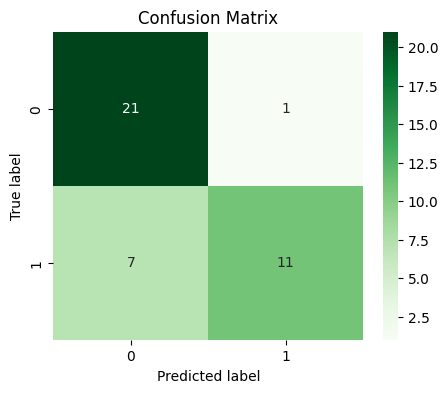

Accuracy: 0.8
Precision: 0.75
Recall: 0.9545454545454546
AUC: 0.7828282828282829
[[21  1]
 [ 7 11]]


In [ ]:
#Variable independiente
X = valorVecTweet
#Variable dependiente
y = clases


#Se divide los datos que serán usado para el entrenamiento y los que serán usados para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se creo el objeto de Árbol de decisión
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)


clf = DecisionTreeClassifier(
    criterion="entropy",         # o "gini"
    max_depth=3,                 # profundidad máxima del árbol
    min_samples_split=4,         # mínimo de muestras para dividir
    min_samples_leaf=1          # mínimo de muestras por hoja

)


#Se entrena el objeto creado
clf = clf.fit(X_train,y_train)

#Se lleva a cabo la predicción con los datos seleccionados para la parte de prueba
y_pred = clf.predict(X_test)


# Crear matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Se muestra la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Indica que tan preciso es en cuanto a las predicciones  positivas del modelo
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='anorexia'))#
# Indica que tan preciso para identificar correctamenta los datos positivos
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='anorexia'))

# Se convierten las etiquetas en valores binarios
y_test_bin = [1 if label == 'anorexia' else 0 for label in y_test]
y_pred_bin = [1 if label == 'anorexia' else 0 for label in y_pred]
# Cálculo de AUC
auc = roc_auc_score(y_test_bin, y_pred_bin)
print("AUC:", auc)

#print( metrics.confusion_matrix(y_test, y_pred))



print( metrics.confusion_matrix(y_test, y_pred))

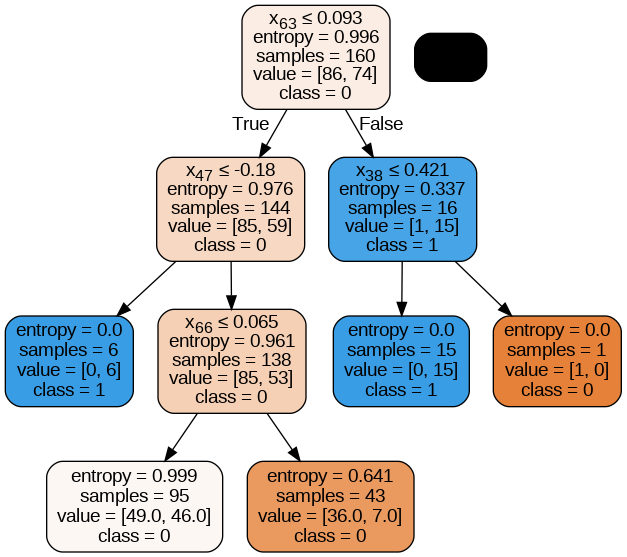

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

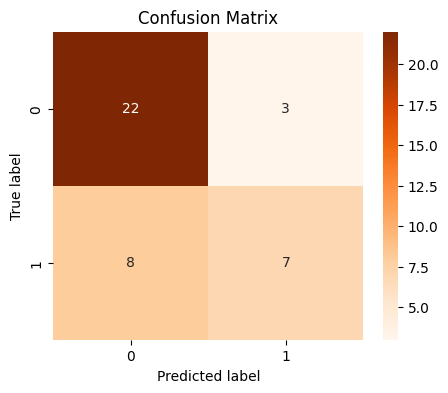

Accuracy: 0.725
Precision: 0.7333333333333333
Recall: 0.88
AUC: 0.6733333333333333


In [ ]:
#Variable independiente
X = valorVecTweet
#Variable dependiente
y = clases


#Se divide los datos que serán usado para el entrenamiento y los que serán usados para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se creo el objeto de Random Forest
#rf = RandomForestClassifier(n_estimators=100, criterion="log_loss", max_depth=6)
rf = RandomForestClassifier(
    n_estimators=150,
    criterion="gini",
    max_depth=6,              # Limita profundidad para evitar overfitting
    min_samples_split=4,      # Más muestras para dividir = menos sobreajuste
    min_samples_leaf=1,       # Reduce hojas muy pequeñas
    max_features='sqrt',
    bootstrap=True

)

#Se entrena el objeto creado
rf = rf.fit(X_train,y_train)

#Se lleva a cabo la predicción con los datos seleccionados para la parte de prueba
y_pred = rf.predict(X_test)

# Crear matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Indica que tan seguido el modelo está en lo correcto
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Indica que tan preciso es en cuanto a las predicciones  positivas del modelo
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='anorexia'))#
# Indica que tan preciso para identificar correctamenta los datos positivos
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='anorexia'))

# Se convierten las etiquetas en valores binarios
y_test_bin = [1 if label == 'anorexia' else 0 for label in y_test]
y_pred_bin = [1 if label == 'anorexia' else 0 for label in y_pred]
# Cálculo de AUC
auc = roc_auc_score(y_test_bin, y_pred_bin)
print("AUC:", auc)

#print( metrics.confusion_matrix(y_test, y_pred))

# SVM

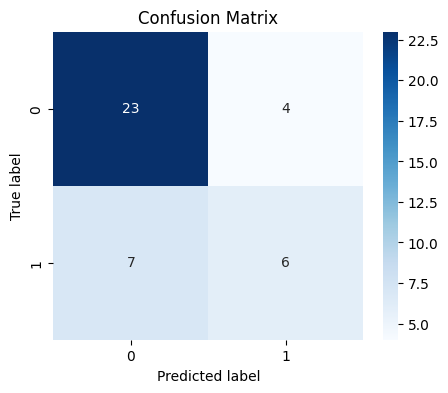

Accuracy: 0.725
Precision: 0.7666666666666667
Recall: 0.8518518518518519
AUC: 0.6566951566951567


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Se crea el objeto clasificador svm
clf = svm.SVC(
    kernel='rbf',        # o 'linear' si crees que los datos son separables linealmente
    C=4,               # penalización (bajo C = margen más amplio, menos overfitting)
    gamma='auto',       # cómo influye cada punto de entrenamiento
)


#Se entrena el modelo con el 80% de los datos asignados
clf.fit(X_train, y_train)

# El modelo predice el valor para los datos designados a la parte de pruebas
y_pred = clf.predict(X_test)

#Se importa la libreías necesaria para calcular la precisión
from sklearn import metrics

# Crear matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Se muestra la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Indica que tan preciso es en cuanto a las predicciones  positivas del modelo
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='anorexia'))#
# Indica que tan preciso para identificar correctamenta los datos positivos
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='anorexia'))

# Se convierten las etiquetas en valores binarios
y_test_bin = [1 if label == 'anorexia' else 0 for label in y_test]
y_pred_bin = [1 if label == 'anorexia' else 0 for label in y_pred]
# Cálculo de AUC
auc = roc_auc_score(y_test_bin, y_pred_bin)
print("AUC:", auc)

#print( metrics.confusion_matrix(y_test, y_pred))

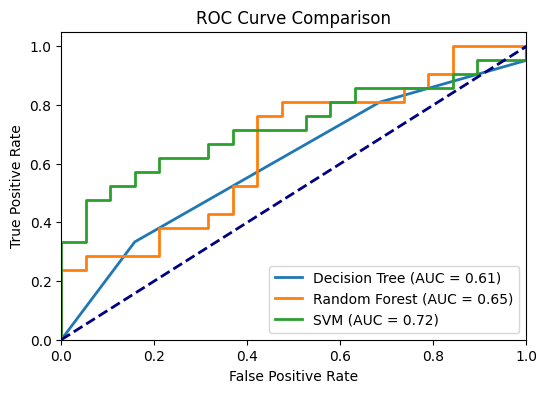

Decision Tree: AUC - ROC = 0.61
Random Forest: AUC - ROC = 0.65
SVM: AUC - ROC = 0.72


In [ ]:
# Comparación de curvas ROC para diferentes clasificadores

#Variable independiente
X = valorVecTweet
#Variable dependiente
y = clases

# Codificar las etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

# Diccionario de modelos a comparar
models = {
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", max_depth=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=3),
    'SVM': svm.SVC(kernel="linear", probability=True)
}
# Diccionario para almacenar los puntajes AUC - ROC
roc_auc_scores = {}
# Crear la figura para la gráfica ROC
plt.figure(figsize=(6, 4))

# Convertir y_test a valores binarios for ROC curve plotting
y_test_bin_roc = [1 if label == 'control' else 0 for label in y_test]

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir las probabilidades
    # For SVC with probability=True, predict_proba returns probabilities
    # For Decision Tree and Random Forest, predict_proba also returns probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calcular el puntaje AUC - ROC
    # Use the binary labels for AUC calculation as well for consistency
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc

    # Calcular la curva ROC using the binary y_test
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Graficar la línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Puntajes AUC - ROC de cada modelo
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.2f}')